In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [4]:
collisions = pd.read_csv("./data/NYPD Motor Vehicle Collisions.csv", index_col=0)
collisions = gpd.GeoDataFrame(collisions, geometry=collisions.apply(lambda srs: Point(srs['LONGITUDE'], srs['LATITUDE']), axis='columns'))

In [3]:
census_tracts = gpd.read_file("./data/nyc_census_tracts_2010.geojson", driver='GeoJSON')

In [5]:
from geoplot import geoplot as gplt

In [6]:
cc = collisions.head(1000)[collisions.head(1000).apply(lambda srs: pd.notnull(srs['geometry'].x) and pd.notnull(srs['geometry'].y), axis='columns')]

In [7]:
cities = gpd.read_file("./data/citiesx010g.shp")
cities_m = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]

In [ ]:
gplt.pointplot(cc, projection=ccrs.PlateCarree())

In [ ]:
gplt.pointplot(cities_m, projection=ccrs.AlbersEqualArea())

In [ ]:
# import mplleaflet
# gplt.pointplot(cc)
# mplleaflet.display()

In [13]:
from random import randint
census_tracts['mock_data'] = [randint(10, 1000) for _ in range(len(census_tracts))]

In [27]:
census_tracts.geometry.centroid

0       POINT (-74.08284700143435 40.64220739237568)
1         POINT (-74.11885867163582 40.628690464851)
2       POINT (-74.11891601868875 40.63559857275349)
3         POINT (-74.11744730397291 40.569883938777)
4       POINT (-74.15652317632156 40.55846210233705)
5       POINT (-74.13523965736783 40.61698346507585)
6       POINT (-74.15149730060644 40.58544594416168)
7       POINT (-74.15697606077916 40.58824232202038)
8       POINT (-74.07030004004521 40.60154511916885)
9       POINT (-74.07850574100875 40.59724129606486)
10      POINT (-74.06512805281285 40.59442830964925)
11      POINT (-74.12723106549609 40.61069216028471)
12      POINT (-73.98732924551167 40.71516407484155)
13      POINT (-73.98112797358827 40.72125975155731)
14      POINT (-73.98370380257315 40.72555680829589)
15      POINT (-74.00615151245944 40.71887026086299)
16      POINT (-73.98146710960538 40.72900263424825)
17      POINT (-73.98408813129652 40.74043932177589)
18       POINT (-73.9840886920058 40.751969059

In [48]:
list(census_tracts.geometry.envelope.iloc[0].exterior.coords)

[(-74.0872330911017, 40.63982216086291),
 (-74.07817619392296, 40.63982216086291),
 (-74.07817619392296, 40.644813726863354),
 (-74.0872330911017, 40.644813726863354),
 (-74.0872330911017, 40.63982216086291)]

In [50]:
census_tracts.geometry.envelope.exterior

0       LINEARRING (-74.08723309110169 40.639822160862...
1       LINEARRING (-74.12490533826229 40.623043787752...
2       LINEARRING (-74.12062692671161 40.634285297736...
3       LINEARRING (-74.12490533826229 40.563900022536...
4       LINEARRING (-74.1609662356181 40.5540427283342...
5       LINEARRING (-74.13979643301015 40.612808980154...
6       LINEARRING (-74.15768797222212 40.580636449714...
7       LINEARRING (-74.16296653192751 40.583362935345...
8       LINEARRING (-74.07789837499109 40.596743687901...
9       LINEARRING (-74.08589956022875 40.592171581228...
10      LINEARRING (-74.07045282761717 40.588983690337...
11      LINEARRING (-74.13229532184985 40.608152981616...
12      LINEARRING (-73.99021872009517 40.714150353743...
13      LINEARRING (-73.98382888466233 40.719938892466...
14      LINEARRING (-73.98749609456291 40.722665378097...
15      LINEARRING (-74.0092215350346 40.7146956508696...
16      LINEARRING (-73.98488459660341 40.726859971374...
17      LINEAR

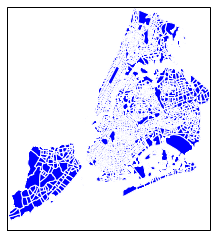

In [51]:
gplt.choropleth(census_tracts, projection=ccrs.AlbersEqualArea(),
                extent=(-74.2589, -73.7004, 40.4774, 40.9176), edgecolor='white')

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(139)choropleth()
-> xmin = np.min(envelopes.map(lambda linearring: np.min([linearring.coords[1][0],
(Pdb) c
-74.2555913638 40.4961153952 -73.7000090639 40.915532777


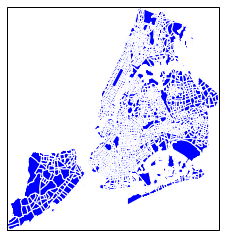

In [57]:
gplt.choropleth(census_tracts, projection=ccrs.AlbersEqualArea(), edgecolor='white')

In [ ]:
# If we are not handed a projection we are in the PateCarree projection. In that case we can return a
# `matplotlib` plot directly, which has the advantage of being native to e.g. mplleaflet.
if not projection:
    return plt.scatter(xs, ys)

# Otherwise, we have to deal with projection settings.
proj_params = dict(projection.proj4_params)
globe = projection.globe